## Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


## Overview

In [3]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Before Standardization

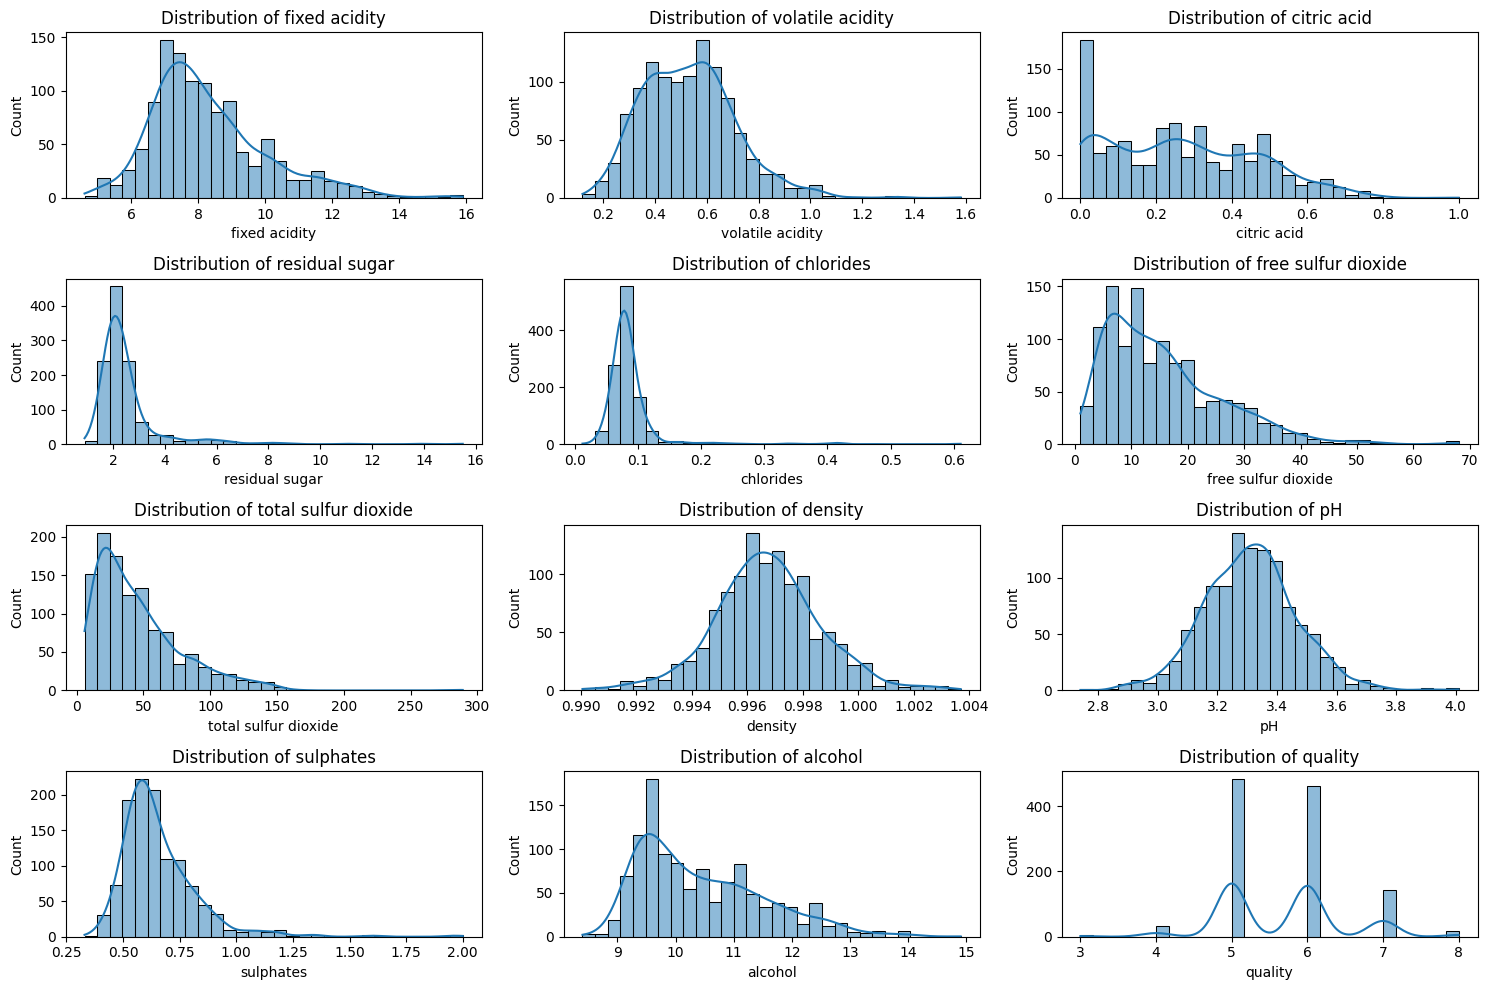

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Standardization

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality'])  
y = df['quality'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((800, 12), (343, 12))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### After Standardization

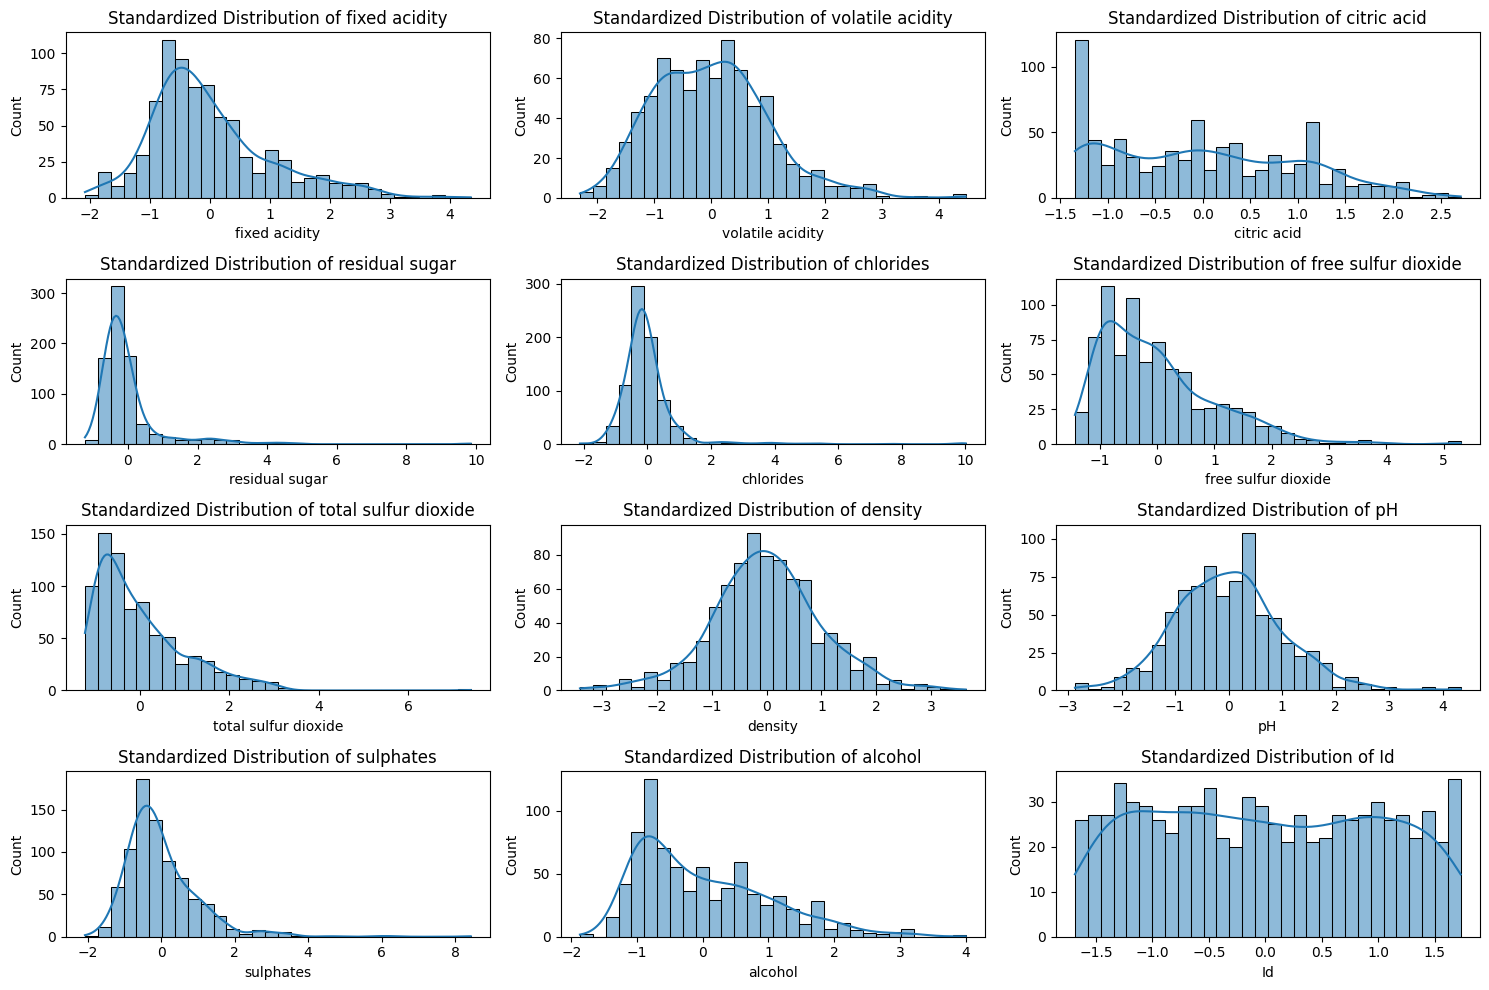

In [9]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot the distribution of each feature in the standardized training data
for i, col in enumerate(X_train_scaled_df.columns):
    sns.histplot(X_train_scaled_df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Standardized Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

##  Normalization

In [10]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Before Normalization 

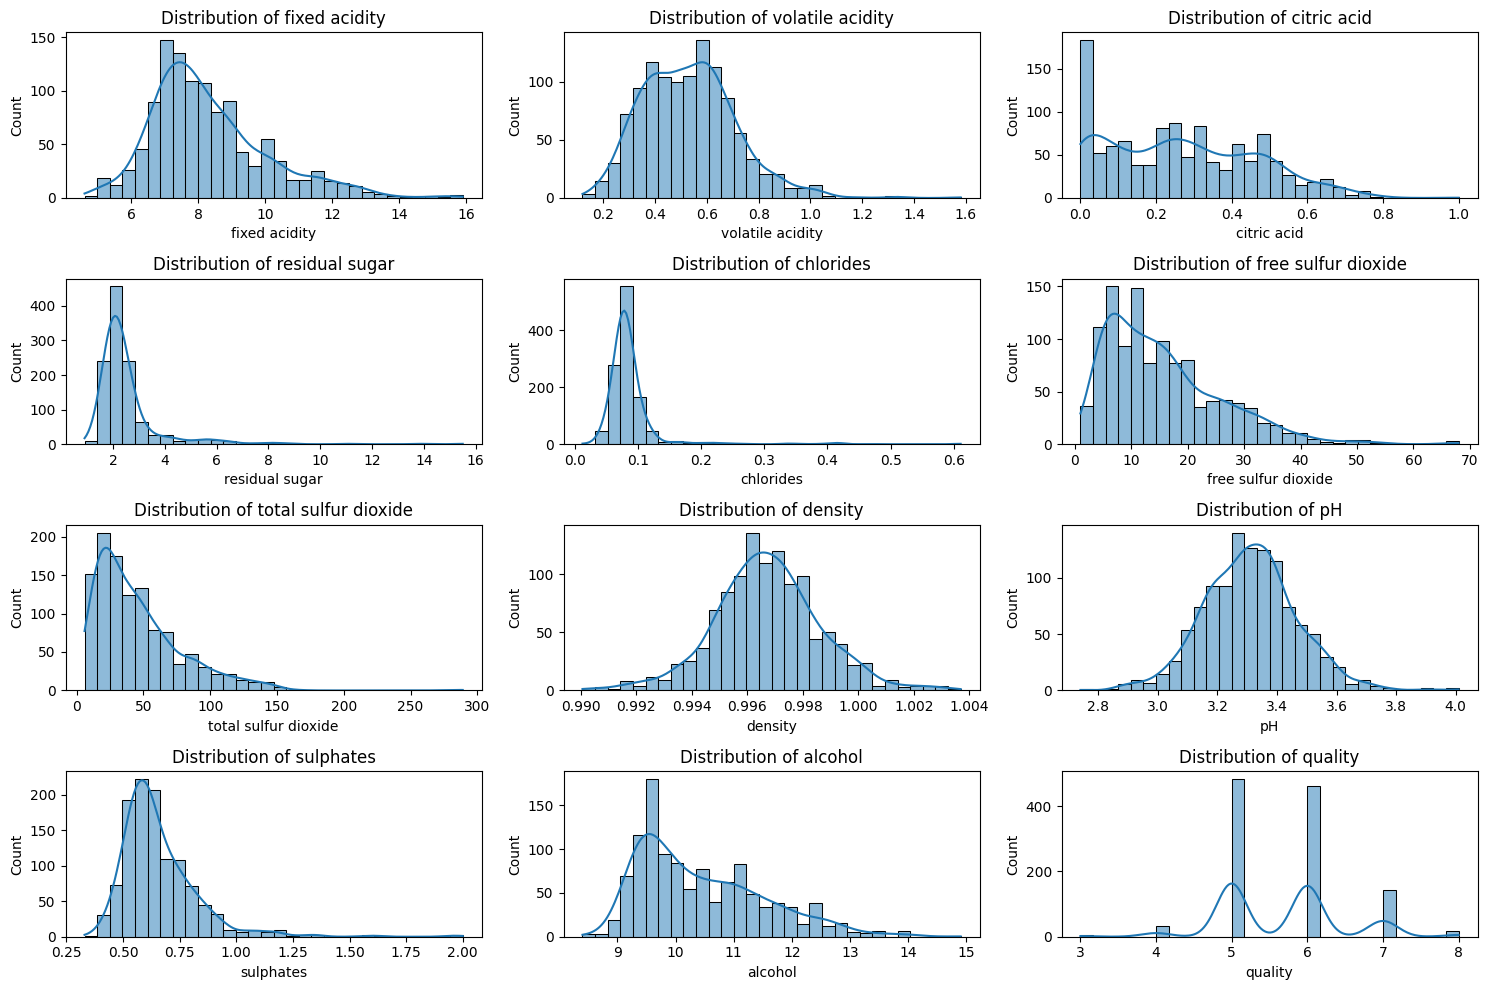

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['quality'])  
y = df['quality'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((800, 12), (343, 12))

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### After Normalization 

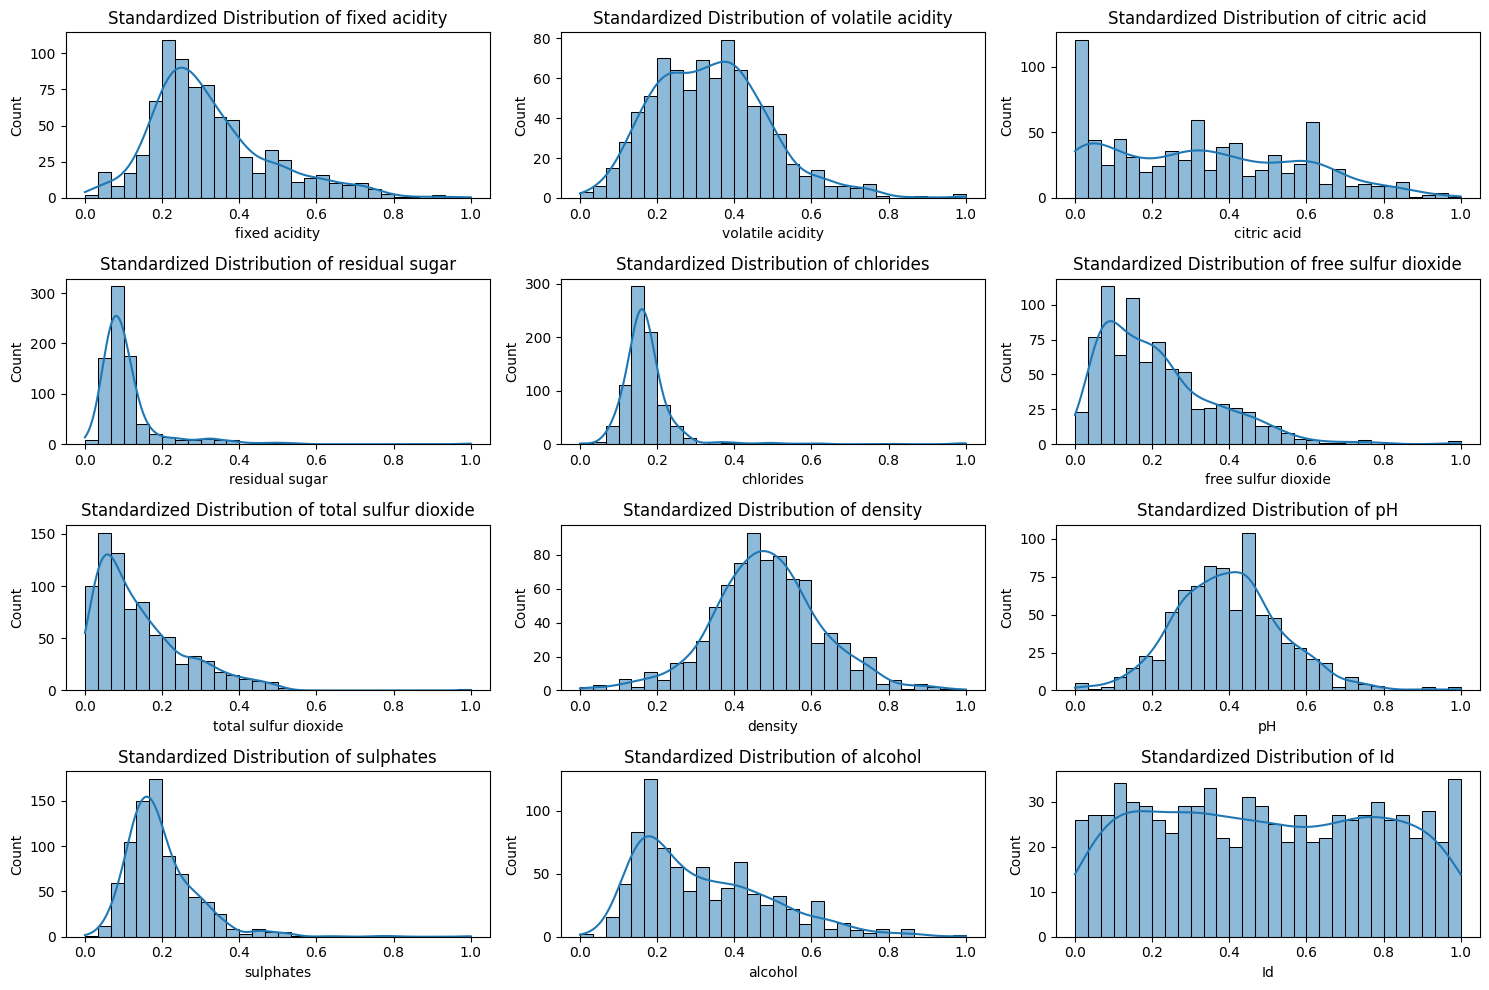

In [14]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot the distribution of each feature in the standardized training data
for i, col in enumerate(X_train_scaled_df.columns):
    sns.histplot(X_train_scaled_df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Standardized Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

## Conclusion

By visualizing the distributions, we can see the differences between standardization and normalization:

- **Standardization**:
  - Preserves the original distribution shape.
  - Rescales the data to have a mean of 0 and a standard deviation of 1.

- **Normalization**:
  - Adjusts all values to fit within the range of 0 to 1.
  - May alter the original distribution shape.
